In [1]:
import os
import pandas as pd

Describe and argue:
    
    – The choice of the architectures, the layer types, the layer sizes and the activations.
    
    – The choice of the different hyper-parameters: batch size, learning rate, number of epochs, regularization weight...
    
    – The choice of the loss function.
    
    – Comparethetime taken by the different models, their memory footprint and their accuracy. What conclusions do you draw?

RNN (Réseau de Neurones Récurrents) : Les RNN sont un choix naturel pour les données séquentielles comme le texte, car ils traitent les entrées un élément à la fois et maintiennent un état caché qui capture des informations provenant des étapes précédentes de la séquence. Cependant, les RNN sont sujets aux problèmes de gradients disparus ou explosés, ce qui les rend plus difficiles à entraîner sur des séquences longues.

LSTM (Long Short-Term Memory) : Les LSTMs résolvent le problème des gradients disparus en introduisant des cellules mémoire qui peuvent stocker des informations sur de longues périodes. Cela rend les LSTMs particulièrement adaptés pour des tâches comme l'analyse de sentiment, où des dépendances à long terme (par exemple, le sentiment global d'une critique) sont cruciales.

GRU (Gated Recurrent Unit) : Les GRUs sont une variation des LSTMs avec une architecture plus simple (moins de portes). Ils ont souvent des performances similaires à celles des LSTMs mais sont moins coûteux en termes de calcul, ce qui en fait un bon choix pour un entraînement plus rapide.

MLP (Multilayer Perceptron) : Un MLP est un réseau de neurones entièrement connecté qui peut être utilisé pour toute tâche de prédiction, y compris l'analyse de sentiments. Il ne gère pas de manière inhérente les données séquentielles comme les RNNs ou LSTMs, mais en utilisant des techniques comme le bag-of-words ou des embeddings de mots, les MLPs peuvent quand même bien performer sur des tâches de classification de texte.

CNN (Convolutional Neural Network) : Bien que les CNNs soient traditionnellement utilisés pour la classification d'images, ils peuvent également être appliqués au texte en utilisant des convolutions 1D. Cette architecture peut capturer des motifs locaux dans le texte (par exemple, des n-grams) et a montré qu'elle fonctionne efficacement pour les tâches de classification de texte.

La couche de sortie utilise une activation sigmoid pour les tâches de classification binaire (sentiment positif ou négatif).

Fonction de perte : Entropie croisée binaire : Pour les tâches de classification binaire comme l'analyse de sentiment (positif ou négatif), la fonction de perte utilisée est généralement l'entropie croisée binaire (binary_crossentropy). Cette fonction calcule la perte log entre la probabilité prédite et la vraie étiquette.

In [ ]:
# Définir le chemin du dossier principal contenant les données
base_dir = 'IMDB_dataset'  # Remplacez par le chemin réel de votre dossier

# Initialiser les DataFrames vides pour les ensembles d'entraînement, de test et non étiquetés
train_df = pd.DataFrame(columns=["text", "label"])
test_df = pd.DataFrame(columns=["text", "label"])
unlabeled_data = pd.DataFrame(columns=["text"])

# Parcourir les dossiers train et test pour charger les fichiers étiquetés
for folder in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        # Créer le chemin complet pour chaque dossier (pos/neg)
        sentiment_folder = os.path.join(base_dir, folder, sentiment)
        
        # Initialiser une liste pour stocker les données de chaque dossier
        texts = []
        labels = []
        
        # Parcourir tous les fichiers .txt dans le dossier
        for filename in os.listdir(sentiment_folder):
            if filename.endswith('.txt'):
                # Créer le chemin complet du fichier
                file_path = os.path.join(sentiment_folder, filename)
                
                # Ouvrir le fichier et lire son contenu
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read()  # Lire tout le contenu du fichier
                
                # Ajouter le texte et l'étiquette correspondante à la liste
                texts.append(text)
                labels.append(1 if sentiment == 'pos' else 0)  # 1 pour positif, 0 pour négatif
        
        # Créer un DataFrame pour le dossier actuel
        temp_df = pd.DataFrame({"text": texts, "label": labels})
        
        # Ajouter les données au DataFrame d'entraînement ou de test
        if folder == 'train':
            train_df = pd.concat([train_df, temp_df], ignore_index=True)
        elif folder == 'test':
            test_df = pd.concat([test_df, temp_df], ignore_index=True)

# Traiter les données non étiquetées dans le dossier 'train/unsup'
unsup_folder = os.path.join(base_dir, 'train', 'unsup')

# Initialiser une liste pour les textes non étiquetés
unlabeled_texts = []

# Parcourir tous les fichiers .txt dans le dossier unsup
for filename in os.listdir(unsup_folder):
    if filename.endswith('.txt'):
        # Créer le chemin complet du fichier
        file_path = os.path.join(unsup_folder, filename)
        
        # Ouvrir le fichier et lire son contenu
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()  # Lire tout le contenu du fichier
        
        # Ajouter le texte à la liste des données non étiquetées
        unlabeled_texts.append(text)

# Créer un DataFrame pour les données non étiquetées
unlabeled_data = pd.DataFrame({"text": unlabeled_texts})

Nombre d'exemples dans le train set : 25000
Nombre d'exemples dans le test set : 25000
Nombre d'exemples non étiquetés dans le train/unsup : 50000

Nombre de 'pos' et 'neg' dans le train set :
label
1    12500
0    12500
Name: count, dtype: int64

Nombre de 'pos' et 'neg' dans le test set :
label
1    12500
0    12500
Name: count, dtype: int64

Exemples du train set :
                                                text label
0  Bromwell High is a cartoon comedy. It ran at t...     1
1  Homelessness (or Houselessness as George Carli...     1
2  Brilliant over-acting by Lesley Ann Warren. Be...     1
3  This is easily the most underrated film inn th...     1
4  This is not the typical Mel Brooks film. It wa...     1

Exemples du test set :
                                                text label
0  I went and saw this movie last night after bei...     1
1  Actor turned director Bill Paxton follows up h...     1
2  As a recreational golfer with some knowledge o...     1
3  I saw this f

In [4]:
# Vérifier la taille des DataFrames et afficher le nombre de "pos" et "neg"
print(f"Nombre d'exemples dans le train set : {train_df.shape[0]}")  # Nombre d'exemples d'entraînement
print(f"Nombre d'exemples dans le test set : {test_df.shape[0]}")    # Nombre d'exemples de test
print(f"Nombre d'exemples non étiquetés dans le train/unsup : {unlabeled_data.shape[0]}")  # Nombre de données non étiquetées

# Afficher le nombre de 'pos' et 'neg' dans les train et test sets
print("\nNombre de 'pos' et 'neg' dans le train set :")
print(train_df['label'].value_counts())  # Affiche la répartition des labels dans le train set

print("\nNombre de 'pos' et 'neg' dans le test set :")
print(test_df['label'].value_counts())  # Affiche la répartition des labels dans le test set

# Afficher les premières lignes des DataFrames pour vérification
print("\nExemples du train set :")
print(train_df.head())

print("\nExemples du test set :")
print(test_df.head())

print("\nExemples des données non étiquetées :")
print(unlabeled_data.head())

Nombre d'exemples dans le train set : 25000
Nombre d'exemples dans le test set : 25000
Nombre d'exemples non étiquetés dans le train/unsup : 50000

Nombre de 'pos' et 'neg' dans le train set :
label
1    12500
0    12500
Name: count, dtype: int64

Nombre de 'pos' et 'neg' dans le test set :
label
1    12500
0    12500
Name: count, dtype: int64

Exemples du train set :
                                                text label
0  Bromwell High is a cartoon comedy. It ran at t...     1
1  Homelessness (or Houselessness as George Carli...     1
2  Brilliant over-acting by Lesley Ann Warren. Be...     1
3  This is easily the most underrated film inn th...     1
4  This is not the typical Mel Brooks film. It wa...     1

Exemples du test set :
                                                text label
0  I went and saw this movie last night after bei...     1
1  Actor turned director Bill Paxton follows up h...     1
2  As a recreational golfer with some knowledge o...     1
3  I saw this f

In [ ]:
# Vérification des valeurs nulles
print("\nVérification des valeurs nulles dans le train set :")
print(train_df.isnull().sum())  # Compte les valeurs nulles dans chaque colonne

print("\nVérification des valeurs nulles dans le test set :")
print(test_df.isnull().sum())  # Compte les valeurs nulles dans chaque colonne

print("\nVérification des valeurs nulles dans les données non étiquetées :")
print(unlabeled_data.isnull().sum())  # Compte les valeurs nulles dans chaque colonne


Vérification des valeurs nulles dans le train set :
text     0
label    0
dtype: int64

Vérification des valeurs nulles dans le test set :
text     0
label    0
dtype: int64

Vérification des valeurs nulles dans les données non étiquetées :
text    0
dtype: int64

Vérification des doublons dans le train set :
96

Vérification des doublons dans le test set :
199

Vérification des doublons dans les données non étiquetées :
493


In [12]:
# Vérification des doublons
print("\nVérification des doublons dans le train set :")
print(train_df.duplicated().sum())  # Nombre de lignes dupliquées dans le train set

print("\nVérification des doublons dans le test set :")
print(test_df.duplicated().sum())  # Nombre de lignes dupliquées dans le test set

print("\nVérification des doublons dans les données non étiquetées :")
print(unlabeled_data.duplicated().sum())  # Nombre de lignes dupliquées dans les données non étiquetées

# Extraire les textes de l'ensemble train et test
train_texts = train_df["text"]
test_texts = test_df["text"]

# Trouver l'intersection entre les deux ensembles de textes (train et test)
common_texts = set(train_texts).intersection(set(test_texts))

# Afficher le nombre d'éléments communs (intersection)
print(f"\nNombre de commentaires communs entre l'ensemble train et l'ensemble test : {len(common_texts)}")


Vérification des doublons dans le train set :
0

Vérification des doublons dans le test set :
0

Vérification des doublons dans les données non étiquetées :
493

Nombre de commentaires communs entre l'ensemble train et l'ensemble test : 0


In [14]:
# Supprimer les doublons dans train et test
train_df = train_df.drop_duplicates(subset=["text"])
test_df = test_df.drop_duplicates(subset=["text"])
unlabeled_data = unlabeled_data.drop_duplicates(subset=["text"])

# Trouver l'intersection
common_texts = set(train_df["text"]).intersection(set(test_df["text"]))

# Supprimer les commentaires communs dans les deux ensembles
test_df = test_df[~test_df["text"].isin(common_texts)]

# Afficher les tailles après nettoyage
print(f"Train set size after cleaning: {train_df.shape[0]}")
print(f"Test set size after cleaning: {test_df.shape[0]}")

Train set size after cleaning: 24904
Test set size after cleaning: 24678


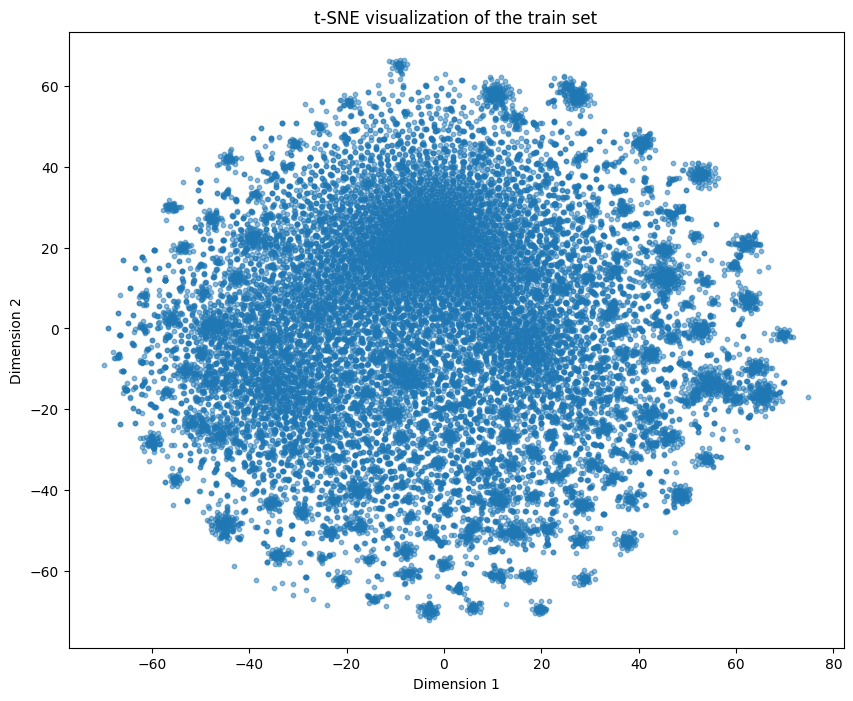

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import seaborn as sns

# 1. Appliquer TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit to 1000 features
train_tfidf = vectorizer.fit_transform(train_df["text"])

# 2. Appliquer t-SNE pour réduction dimensionnelle à 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(train_tfidf.toarray())


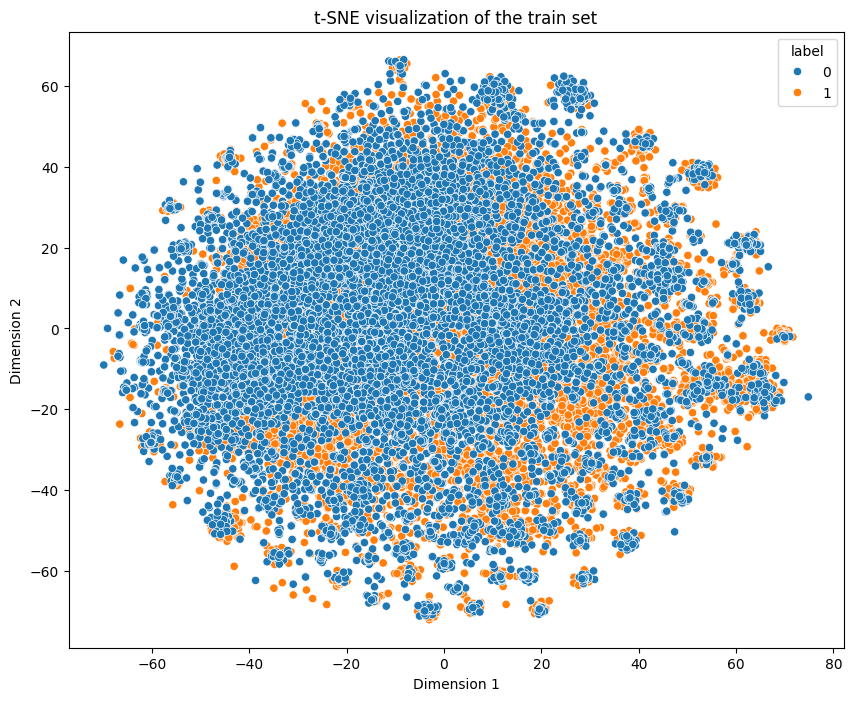

In [18]:
import seaborn as sns
# 3. Tracer le graphique
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=train_df['label'] )
plt.title("t-SNE visualization of the train set")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
train_df['label'] = train_df['label'].astype('category')
model = LogisticRegression(max_iter=1000)
model.fit(train_tfidf, train_df['label'])

train_score = model.score(train_tfidf,train_df['label'] )
print(train_score)

0.8720285897847735
